# Job Skills Analysis

<h3 style="margin-top: 5px; margin-bottom: 6px;">Question to Answer</h3>
<p style="font-size:15px; margin-top: 0; margin-bottom: 16px;">

<b>What are the skills most in demand for the junior and senior data roles?</b>
</p>

<h4 style="margin-bottom: 4px;">Methodology</h4>

<ol style="margin-top: 4px; line-height: 1.5;">
  <li>Cleaned and standardized the <code>job_skills</code> column.</li>
  <li>Calculated the skill count for each <code>job_title_short</code>.</li>
  <li>Computed the <b>percentage share</b> of each skill within job titles.</li>
  <li>Visualized the <b>top 5 most requested skills</b> for both <b>junior</b> and <b>senior</b> roles.</li>
</ol>

### Importing Libraries and Dataset
<hr>


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# importing cleaned dataset
df = pd.read_csv('data_cleaned_jobs.csv')

# data parsing
df['job_posted_date'] = pd.to_datetime(df.job_posted_date).dt.date
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,company_name,job_skills,original_salary_year_avg
0,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,False,United States,100000.0,"TWO95 International, Inc","[sql, sql server, excel, ssrs, power bi, power...",NaN
1,Data Analyst,Product Managers Data analyst,"Boston, MA",via LinkedIn,Full-time,False,2023-01-01,False,False,United States,90000.0,Diverse Lynx,[sql],NaN
2,Data Scientist,AI/ML Radar Research Data Scientist Jobs,"San Diego, CA",via Clearance Jobs,Full-time,False,2023-01-01,False,False,United States,135000.0,Leidos,"[python, matlab]",NaN
3,Data Analyst,Data Management Analyst,"Dallas, TX",via Indeed,Full-time,False,2023-01-01,False,False,United States,92500.0,KORE1 Technologies,"[sql, excel, tableau, terminal]",NaN
4,Data Scientist,Data Science Consultant,"San Francisco, CA",via Mendeley,Full-time,False,2023-01-01,False,False,United States,157500.0,Resume Library,NaN,NaN


### Skills count per job title
<hr>

In [17]:
# exploding the skills list
df_exploded = df[df.job_skills.notna()].explode('job_skills', ignore_index=True)
df_exploded.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_health_insurance,job_country,salary_year_avg,company_name,job_skills,original_salary_year_avg
0,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",sql,NaN
1,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",sql server,NaN
2,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",excel,NaN
3,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",ssrs,NaN
4,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",power bi,NaN
5,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",powerpoint,NaN
6,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.0,"TWO95 International, Inc",visio,NaN
7,Data Analyst,Product Managers Data analyst,"Boston, MA",via LinkedIn,Full-time,False,2023-01-01,False,United States,90000.0,Diverse Lynx,sql,NaN
8,Data Scientist,AI/ML Radar Research Data Scientist Jobs,"San Diego, CA",via Clearance Jobs,Full-time,False,2023-01-01,False,United States,135000.0,Leidos,python,NaN
9,Data Scientist,AI/ML Radar Research Data Scientist Jobs,"San Diego, CA",via Clearance Jobs,Full-time,False,2023-01-01,False,United States,135000.0,Leidos,matlab,NaN


In [18]:
# Count occurrences of each skill within every job title
df_skills_count = df_exploded.groupby(['job_title_short', 'job_skills'])['job_title_short'].count()
df_skills_count = df_skills_count.reset_index(name='skills_count')

# Calculate total number of job postings per job title
total_job_posting = df[df.job_skills.notna()]['job_title_short'].value_counts().reset_index(name='total_skills_count')
total_job_posting

# Merge skill-level counts with total postings to compute skill share in job postings per role
df_skills_demand = pd.merge(df_skills_count, total_job_posting, how='left', on='job_title_short')
df_skills_demand['% share'] = 100*(df_skills_demand.skills_count)/(df_skills_demand.total_skills_count)
df_skills_demand

# Sort job titles by frequency of job postings
job_titles = df['job_title_short'].value_counts().index

# Extract top 5 most demanded skills for each job title
top_skills = {}
for title in job_titles:
   top_5_skills = (df_skills_demand[df_skills_demand.job_title_short == title]
                   .sort_values(by='skills_count' ,ascending=False)
                   [['job_skills', '% share']]
                   .head(5)
                   .set_index('job_skills', drop=True)
   )
   top_skills[title] = top_5_skills


# Display one value from the top_skills dictonary
top_skills['Data Analyst']

,% share
job_skills,
sql,60.184936
excel,48.775734
tableau,34.167479
python,32.821927
sas,23.950407


### Plotting skills count
<hr>

##### Skills count for junior roles

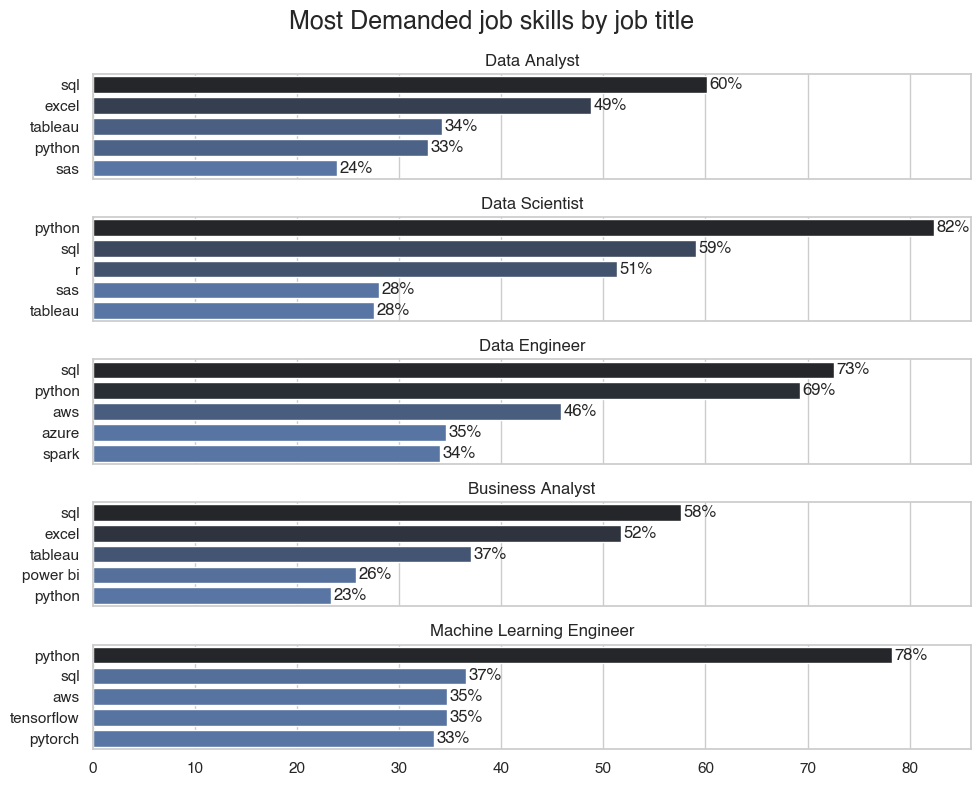

In [19]:
# finding junior roles
junior_roles = [x for x in job_titles if 'Senior' not in x]

# setting plot theme
sns.set_theme(style="whitegrid", context='notebook', palette='deep', font='Helvetica')

# plotting top 5 skills count for junior roles
fig, ax = plt.subplots(len(junior_roles), 1, figsize=(10,8), sharex=True)

for i, title in enumerate(junior_roles):
   data_series = top_skills[title]
   sns.barplot(data=data_series, x='% share', y='job_skills', ax=ax[i], hue='% share', palette='dark:b_r')
   ax[i].set_ylabel('')
   ax[i].set_title(title)
   ax[i].legend().remove()
   ax[i].set_xlabel('')
   ax[i].set_xlim(0, 86)

   for ind, v in enumerate(data_series['% share']):
      ax[i].text(v+0.25, ind, f'{round(v)}%', va='center')

fig.suptitle('Most Demanded job skills by job title', fontsize=18, fontweight='bold')
fig.tight_layout()

##### Skills count for senior roles

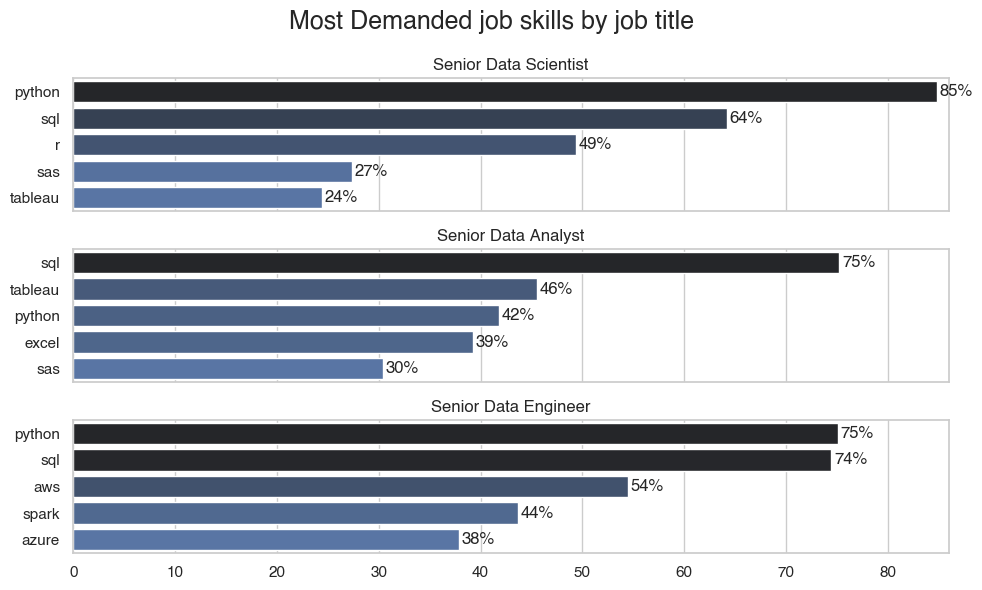

In [20]:
# finding junior roles
senior_roles = [x for x in job_titles if 'Senior' in x]

# plotting top 5 skills count for senior roles
fig, ax = plt.subplots(len(senior_roles), 1, figsize=(10,6), sharex=True)

for i, title in enumerate(senior_roles):
   data_series = top_skills[title]

   sns.barplot(data=data_series, x='% share', y='job_skills', ax=ax[i], hue='% share', palette='dark:b_r')
   ax[i].set_ylabel('')
   ax[i].set_title(title)
   ax[i].legend().remove()
   ax[i].set_xlabel('')
   ax[i].set_xlim(0, 86)

   for ind, v in enumerate(data_series['% share']):
      ax[i].text(v+0.25, ind, f'{round(v)}%', va='center')

fig.suptitle('Most Demanded job skills by job title', fontsize=18, fontweight='bold')
fig.tight_layout()